# 1. Descripción del problema (Corte de varillas)

Entrada: Largo de varilla $n$, vector de precios por cada medida $i=1..n$.

Salida: Retorno máximo $r_n$ que se puede obtener cortando la varilla y vendiendo las partes.

El problema de corte de varillas es un problema de optimización mediante programación dinámica que obtiene el precio óptimo para vender la "varilla" a una mayor ganancia. Como recordatorio, la programación dinámica es la optimización de algoritmos al ir guardando soluciones anteriores (subproblemas) y reutilizandolas al ser necesario, así evitando hacer trabajos redundantes.

# 2. Cutting a Rod

El siguiente código contiene implementaciones del algoritmo **cutRod** de manera recursiva y mediando programación dinámica (bottom-up)

## 2.1. Código

In [38]:
import random as rd
from termcolor import colored
import math as mt
import matplotlib.pyplot as plt
import copy
import datetime
from timeit import repeat
import statistics as st

In [39]:
def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r = rd.randint(0,10)
    A.append(prev+r)
    prev += r
  return A

In [40]:
llamadas = 0
# Recursivo
def cutRodRec(precios, largo, verbose = False):
  if (largo == 0): 
    if verbose: print("Caso base: retornamos 0, ya que una varilla de este largo no genera ganancia.")
    return 0

  valMax = -mt.inf

  for i in range(1, largo + 1):
    global llamadas
    llamadas += 1
    if verbose: print(f"Cortamos varilla de largo {largo-i}.")
    valMax = max(valMax, precios[i-1] + cutRodRec(precios, largo - i))
    if verbose: print(f"Ganancia Maxima hasta ahora: {valMax}")


  if verbose: print(f"{valMax} sera nuestra maxima ganancia.")
  if verbose: print("---------------------------------------")
  return valMax

A = [1, 5, 8, 9, 10, 17, 17, 20]
gananciaMayor = cutRodRec(A, len(A))
print("Maxima ganancia posible:", gananciaMayor)
print("Llamadas recursivas realizadas:", llamadas)

Maxima ganancia posible: 22
Llamadas recursivas realizadas: 255


In [41]:
subProblemas = 0
# Dinamica (bottom-up)
def cutRodDin(precios, largo, verbose = False):
  # Crear arreglos para almacenar las ganancias máximas y los cortes necesarios para cada ganancia máxima
  valores = [0 for x in range(largo + 1)]
  cortes = [0 for x in range(largo + 1)]
  valores[0] = 0
  
  # Trabajamos con una varilla de largo "i" 
  for i in range(1, largo + 1):
    if verbose: print(f"Se evalua una varilla de largo {i}.")
    valMax = -mt.inf
    
    # Dividimos la varilla de largo "i" en dos varillas de largo "j" y "i-j-1" y calculamos la ganancia máxima entre ambas
    for j in range(i): 
      if verbose: print(f"Caso {j+1}: la varilla es de largo {j+1}.")
      global subProblemas
      subProblemas += 1
      if (valMax < precios[j] + valores[i-j-1]): 
        if verbose: print(f"Valor maximo actual: {valMax}")
        if verbose: print(f"La maxima ganancia es el mayor valor entre {valMax} y {precios[j] + valores[i-j-1]} ({precios[j]} (Precio por largo {j+1}) + {valores[i-j-1]} (Arreglo de maximas ganancias en la posición {i-j-1}))")
        valMax = max(valMax, precios[j] + valores[i-j-1])
        if verbose: print(f"Maxima ganancia encontrada hasta ahora: {valMax}")
        cortes[i] = j
    
      if verbose: print("------------------------------------------------------") 
    # Se almacena la ganancia máxima para la varilla de largo "i"
    valores[i] = valMax 

  return valores[largo], cortes

In [42]:
A = [6, 2, 13, 15, 10, 14, 12, 20]
gananciaMayor, cortes = cutRodDin(A, len(A))
print("Maxima ganancia posible:", gananciaMayor)
print("Cantidad de sub-problemas resueltos:", subProblemas)
print("Cortes:", cortes[len(A)])

Maxima ganancia posible: 48
Cantidad de sub-problemas resueltos: 36
Cortes: 0


## 2.2. Descripción del algoritmo

Debemos explicar la sub-estructura optima del problema y la función recursiva para el retorno máximo antes de comenzar con el funcionamiento del algoritmo en si:

La sub-estructura óptima se refiere a soluciones óptimas de sub-problemas relacionados que se puedan resolver de forma independiente. En nuestro caso del problema de la varilla, este se basa en realizar un corte, analizar las ganancias posibles después del corte y encontrar una ganancia máxima construyendo la solución basándose en las soluciones óptimas de los otros cortes (sub-problemas), podemos afirmar que el problema posee una sub-estructura optima, y por ende, se puede resolver con programación dinámica.

La función recursiva para el retorno máximo se refiere a como el retorno máximo $r_n$ para un problema de largo $n$ puede ser el precio de la varilla completa $p_n$ o el precio de una sub-varilla $p_i$, más el retorno máximo $r_{n-i}$ de la varilla restante.

$r_n=\max\limits_{i=1..n}(p_i+r_{n-i})$, considerando que $r_0=0$

Con esto en cuenta, podemos explicar el funcionamiento del algoritmo en ambas de sus implementaciones.

### 2.2.1 Algoritmo Recursivo
El algoritmo comienza recibiendo un arreglo con precios para cada corte de varilla y un largo $n$ de una varilla.

1. Comienza un ciclo iterativo para calcular la máxima ganancia posible para cada largo de la varilla (desde largo 1 hasta el largo ingresado).

2. Para calcular la ganancia máxima cada vez, el algoritmo se llama recursivamente con el fin de resolver todos los sub-problemas para un largo de varilla $i$ (estos sub-problemas son encontrar cada precio de venta que se puede obtener con un largo de varilla entregado, para luego retornar el mayor de estos precios).

3. Se repite lo anterior hasta que se calcule la máxima ganancia obtenible por la venta de una varilla del largo ingresado.

Al terminar el proceso anterior, se retorna la mayor ganancia que se puede obtener al cortar la varilla ingresada.

### 2.2.2 Algoritmo Bottom-Up

El algoritmo recibe un arreglo con precios para cada corte de varilla y un largo $n$ de una varilla.

1. Creamos un arreglo para almacenar las ganancias máximas de cada corte posible. Su primera posición se inicializa en 0, ya que una varilla de largo 0 no genera ganancia.

2. Entramos a los ciclos iterativos y resolvemos cada sub-problema de tamaño $i$, para $i = 1, 2, ..., n$ con el fin de encontrar la ganancia máxima de cada uno.

3. Cada vez que salimos del ciclo interno, guardamos la máxima ganancia calculada en el arreglo de valores.

4. Al final, se retorna la posición n-ésima del arreglo de valores (o ganancias máximas), posición que corresponde al largo de la varilla indicado en un principio.

Al terminar el proceso anterior, el algoritmo retorna la mayor ganancia que se puede obtener al cortar la varilla ingresada.

## 2.3 Ejemplo

En nuestro ejemplo sólo explicaremos la implementación con programación dinámica, ya que esta es mucho más eficiente que su versión recursiva.

Ingresamos un arreglo $a$ de valores y el largo de la varilla a evaluar:

$a = [1, 5, 8, 9, 10, 17, 17, 20]$

$l = 3$

Se entra a la función *cutRodDin* y ocurre el siguiente procedimiento:

1. Creamos un arreglo de ganancias $g$ para guardar las máximas ganancias que se pueden obtener con cada largo de la varilla.

  $g = [0, 0, 0, 0, 0, 0, 0, 0, 0]$

2. Analizamos cada caso posible de ganancia de la varilla, desde 0 hasta el largo ingresado.

3. Primero analizamos la ganancia de una varilla de largo máximo $l = 1$. Una varilla de largo 1 sólo tiene una opción de venderse. De forma completa, su ganacia máxima es igual a 1. Entonces actualizamos el arreglo de ganancias.

  $g = [0, 1, 0, 0, 0, 0, 0, 0, 0]$

4. Después analizamos la ganancia de una varilla de largo máximo igual a 2. Para este largo tenemos 2 casos:

 - 4.1 La varilla se divide en dos partes de largo $l = 1$, con una ganancia igual a 2.

 - 4.2 La varilla se vende completa (sin cortarse), la ganancia es igual a 5.

  Podemos apreciar que la ganancia por la venta sin cortar es mayor a la ganancia de la venta por partes, por lo que la máxima ganancia para el largo 2 es igual a 5.

  $g = [0, 1, 5, 0, 0, 0, 0, 0, 0]$

5. Finalmente, analizamos la ganancia de una varilla de largo máximo $l = 3$. Aqui tenemos 3 casos posibles:

 - 5.1 La varilla se divide en tres partes de largo 1, lo que generaría una ganancia igual a 3.

 - 5.2 La varilla se divide en dos partes, una de largo 1 y otra de largo 2, lo que generaría una ganancia igual a 6.

 - 5.3 La varilla se vende completa (sin cortarse), la ganancia es igual a 8.

 Y en estos casos previos, la ganancia por la venta sin cortar es mayor a los demás casos posibles, por lo que la máxima ganancia para el largo 3 es igual a 8.

Finalmente, se encontró la ganancia máxima para una varilla de largo 3, por lo que se retorna este valor, el cúal es igual a 8.

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada iteración del algoritmo.

### 2.4.1 Cut Rod Recursivo (cutRodRec)

In [43]:
llamadas = 0
A = [1, 5, 8, 9, 10, 17, 17, 20]
print("Arreglo de entrada:", A)
print("------------------------------------------------------")
tamanoVarilla = 3
gananciaMayor = cutRodRec(A, tamanoVarilla, verbose = True)
print("Maxima ganancia posible:", gananciaMayor)
print("Cantidad de sub-problemas resueltos:", subProblemas)

Arreglo de entrada: [1, 5, 8, 9, 10, 17, 17, 20]
------------------------------------------------------
Cortamos varilla de largo 2.
Ganancia Maxima hasta ahora: 6
Cortamos varilla de largo 1.
Ganancia Maxima hasta ahora: 6
Cortamos varilla de largo 0.
Ganancia Maxima hasta ahora: 8
8 sera nuestra maxima ganancia.
---------------------------------------
Maxima ganancia posible: 8
Cantidad de sub-problemas resueltos: 36


Podemos ver en el ejemplo previo como la implementación recursiva del algoritmo se basa en iterar hasta llegar a una varilla de largo 0 y luego ir calculando la ganancia máxima posible para cada largo hasta llegar al largo que había sido ingresado al comienzo del programa. Luego, retorna la máxima ganancia posible para el largo indicado.

### 2.4.2 Cut Rod Bottom-Up (cutRodDin)

In [44]:
subProblemas = 0
A = [1, 5, 8, 9, 10, 17, 17, 20]
print("Arreglo de entrada:", A)
print("------------------------------------------------------")
tamanoVarilla = 3
gananciaMayor, cortes = cutRodDin(A, tamanoVarilla, verbose = True)
print("Maxima ganancia posible:", gananciaMayor)
print("Cantidad de sub-problemas resueltos:", subProblemas)

Arreglo de entrada: [1, 5, 8, 9, 10, 17, 17, 20]
------------------------------------------------------
Se evalua una varilla de largo 1.
Caso 1: la varilla es de largo 1.
Valor maximo actual: -inf
La maxima ganancia es el mayor valor entre -inf y 1 (1 (Precio por largo 1) + 0 (Arreglo de maximas ganancias en la posición 0))
Maxima ganancia encontrada hasta ahora: 1
------------------------------------------------------
Se evalua una varilla de largo 2.
Caso 1: la varilla es de largo 1.
Valor maximo actual: -inf
La maxima ganancia es el mayor valor entre -inf y 2 (1 (Precio por largo 1) + 1 (Arreglo de maximas ganancias en la posición 1))
Maxima ganancia encontrada hasta ahora: 2
------------------------------------------------------
Caso 2: la varilla es de largo 2.
Valor maximo actual: 2
La maxima ganancia es el mayor valor entre 2 y 5 (5 (Precio por largo 2) + 0 (Arreglo de maximas ganancias en la posición 0))
Maxima ganancia encontrada hasta ahora: 5
-------------------------------

Y en este ejemplo, se puede observar como al utilizar progamación dinámica para implementar el algoritmo, solo calcula la ganancia una vez a diferencia de la implementación recursiva, en la cual pueden ser calculadas múltiples veces innecesariamente. Este algoritmo bottom-up va revisando cada largo de varilla desde 1 hasta el largo ingresado al comienzo, calcula cada ganancia posible para los largos distingtos y guarda la mayor. Retornando finalmente la ganancia máxima encontrada para el largo de varilla ingresado.

# 3. Tiempo de ejecución

### **Teorema (Tiempo de ejecución).**

*El **cutRod** tiene un tiempo de ejecución de $O(n^2)$ en el peor caso*

### **Prueba del Teorema**

Para comprobar si nuestro teorema es correcto, definiremos una función matemática para describir la cantidad de sub-problemas que debemos resolver en función de un tamaño de entrada $n$:

$T(n)=\sum\limits_{i=1}^{n+1}\sum\limits_{j=0}^{i}c$

Esta función esta compuesta de 2 sumatorias, una correspondiente al largo máximo de cada varilla, desde 1 al largo deseado y a los sub-problemas de cada varilla, donde se calcula la ganancia máxima para cada largo de varilla.

$T(n)=c\sum\limits_{i=1}^{n+1}j$

Resolviendo esta sumatoria, obtenemos que:

$T(n) = O(n^2)$

Con la función previa, podemos encontrar el tiempo de ejecución de los sub-problemas individuales, estos siendo igual a $O(n)$ cada uno.

Como *cutRod* se basa en dos sumatorias de $O(n)$, cada una con un tiempo de ejecución $O(n)$, comprobamos que el tiempo de ejecución del algoritmo es $O(n^2)$.

### **Complejidad espacial**

*cutRod* tiene una complejidad espacial de $O(n)$. Ya que este algoritmo utiliza un arreglo de largo $n$ (largo de varilla) en el que va almacenando la ganancia máxima de venta de cada largo de la varilla desde 0 hasta $n + 1$.

# 4. Correctitud

### **Teorema (Correctitud de Select)**

*El algoritmo **cutRod** recibe un arreglo: $[a_1',a_2',...,a_n']$ de precios de venta y un largo de varilla $l$, después retorna la máxima ganancia posible al vender una varilla de largo $l$.

## Prueba del Teorema

Para probar el teorema, utilizaremos inducción matemática.


##### **Caso base (n = 0)**

Cuando la varilla es de largo 0, retornamos 0 debido a que una varilla de largo 0 no puede generar ganancias.

##### **Caso inductivo ($n > 0$)**

Cuando la varilla tiene un largo mayor a 0, existen 2 opciones que derivan de la siguiente línea de código:

    valMax = max(valMax, precios[j] + valores[i-j-1])

1. Cuando "precios[ j ] + valores[i - j - 1]" es mayor que "valMax", asumimos que el sub-problema (precios[ j ] + valores[i - j - 1]) ya fué resuelto en iteraciones anteriores, por lo que se obtiene la ganancia máxima.

2. Cuándo "valMax" es mayor o igual, se obtiene la máxima ganancia para el largo de la varilla que estemos evaluando en dicho momento.


##### **Correctitud**

Como los previos dos pasos son correctos, podemos concluir que el teorema de correctitud es correcto para nuestro algoritmo **cutRod**.

# 5. Experimentos

## 5.1 Bottom-Up v/s Recursivo (tiempo de ejecución)

En los proximos gráficos se visualizarán los tiempos de ejecución de los algoritmos *cutRodDin* y *cutRodRec* en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre 10 y 500 (para *cutRod*) y 10 y 20 (para *cutRodRec* debido a su complejidad exponencial).

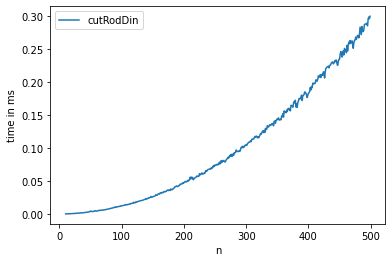

In [45]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]

for n in range(10,500):

  a = random.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces cutRod con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import cutRodDin", stmt=f"cutRodDin({a}, {len(a)})", repeat=1, number=20)

  x.append(n)
  y.append(t)


plt.plot(x,y)
plt.legend(["cutRodDin"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

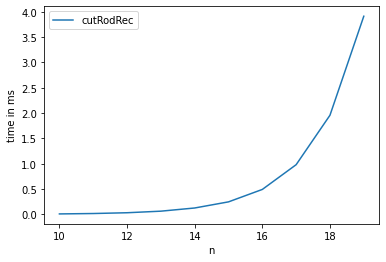

In [46]:
z=[]; w=[]

for n in range(10,20):

  a = random.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces cutRodRecursivo con el arreglo a y retorna el mejor tiempo obtenido.
  t2 = repeat(setup="from __main__ import cutRodRec", stmt=f"cutRodRec({a}, {len(a)})", repeat=1, number=20)

  z.append(n)
  w.append(t2)


plt.plot(z,w)
plt.legend(["cutRodRec"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Análisis de resultados

Podemos observar en los previos gráficos que la implementación bottom-up es mucho más eficiente que la recursiva. Podemos corroborar esto viendo que *cutRodDin* posee una complejidad $O(n^2)$ mientras que *cutRodRec* tiene una complejidad exponencial $O(2^n)$. Si observamos de cerca los graficos, podemos ver que la implementacion con programación dinámica demora alrededor de 0.3ms en procesar una varilla de largo 500, mientras que la recursiva demora cerca de 4ms en procesar una varilla de largo 20.

## 5.2 Cantidad de sub-problemas a resolver (Bottom-Up)

A continuación mostraremos un gráfico en el que se visualiza la cantidad de sub-problemas que resuelve *cutRodDin* para tamaños de problemas con n ∈ [5, 99].

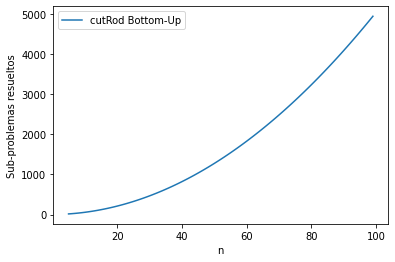

In [47]:
x=[n for n in range(5,100)] 
y=[]; 

for n in range(5,100):
  a = cutrod_instance_generator(n)

  subProblemas = 0
  cutRodDin(a, len(a))

  y.append(subProblemas)

plt.plot(x,y)
plt.legend(["cutRod Bottom-Up"])

plt.xlabel('n')
plt.ylabel('Sub-problemas resueltos')
plt.show()

### Análisis de resultados

En el gráfico anterior, vemos que la cantidad de sub-problemas resueltos va aumentando en $\frac{n^2}{2}$ cada vez. Esto se debe a que, como habiamos afirmado previamente, el algoritmo se compone de 2 sumatorias de complejidad $O(n)$. Cómo en este gráfico sólo estamos contando la cantidad de sub-problemas resueltos (segunda sumatoria), la cantidad de sub-problemas contabilizados será igual a $O(n^2)$ (complejidad de ambas sumatorias juntas) dividido en 2, ya que sólo estamos fijandonos en una sola sumatoria y no en ambas. Podemos apreciar esto cuando se trabaja con un n = 100, los problemas totales resueltos para este caso serían 10000, pero como sólo estamos calculando los sub-problemas resueltos, entonces el resultado es 5000.